<a href="https://colab.research.google.com/github/franciscoost/Data-Science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/franciscoost/Data-Science/blob/master/data/Logo%20Francisco%20Data%20Science%20500px%20X%20500px%20Branco%20s%20fundo.png?raw=true" height="100px"></center>



# Análise dos Dados do Airbnb - Sicília, Itália



De acordo com a definição formal, o [Airbnb](https://www.airbnb.com.br/) *é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem.* Com pouco mais de 10 anos de fundação, a Startup já **hospedou mais de 300 milhões de pessoas** ao redor do mundo todo, e já é considerada a **maior empresa hoteleira da atualidade**. 

Mas o que surpreende mesmo é o detalhe de que ele **não possui nenhum hotel**!

O conceito do Airbnb é o de conectar pessoas que querem viajar e se hospedar com anfitriões dispostos a alugar seus imóveis - tudo de uma maneira prática e inovadora - através de uma plataforma de hospedagem alternativa.

De maneira transparente e que incentiva o desenvolvimento de projetos e soluções de *Data Science*, o Airbnb disponibiliza por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) uma grande quantidade de dados, coletados em algumas das principais cidades do mundo.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à Sicília, quinta maior cidade da Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados foram coletados pelo portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html). \

Para realizar a Análise Exploratória dos Dados, utilizaremos apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Sicily (good for visualisations).*

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/sicilia/sicily/2019-11-29/visualisations/listings.csv")

## Análise Exploratória dos Dados

Esta etapa possui como finalidade a apresentação da estrutura dos dados, de forma que permita uma consciência situacional inicial.

Para começar, vamos dar um "oi" para nosso *dataset* e analisar as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7011,SEASIDE - Historic Antique Residence,16888,Salinara Yu&Ad,NaN,Marsala,37.84047,12.47778,Entire home/apt,180,2,26,2019-10-06,0.21,8,258
1,14561,Great panoramic apartment downtown,57243,Davide Erasmus,NaN,Palermo,38.11486,13.36380,Entire home/apt,82,2,60,2019-09-09,0.53,12,150
2,22948,ROOM WITH BALCONY,88837,Giuseppe,NaN,Agrigento,37.30885,13.58582,Private room,26,1,235,2019-11-16,2.34,3,353
3,28379,Apartment in Taormina - Rinaldo,121867,Francesca,NaN,Taormina,37.85197,15.28365,Entire home/apt,87,2,245,2019-10-10,2.16,6,0
4,31099,Studio apartment near CalaCreta bay,133563,Rosa,NaN,Lampedusa e Linosa,35.50229,12.61660,Entire home/apt,48,3,50,2019-09-15,0.56,2,365


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias




### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora, vamos verificar a quantidade de atributos/entradas e quais os tipos das variáveis do nosso *dataset*. 

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar o tipo das entradas do dataset
df.dtypes

Entradas:	 53726
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Opa! Possuímos **16 colunas de variáveis**, dispostas em **53726 linhas de entrada** de dados. O tipo de cada uma dessas variáveis está listado acima

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* e a quantidade de valores ausentes são grandezas inversamente proporcionais. Antes de nos aprofundarmos, é necessário verificar se a nulidade de alguns valores é significativa se comparada com o total de entradas.



In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.357555
last_review                       0.357555
host_name                         0.008655
name                              0.000186
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Vamos dar uma olhada no que encontramos:

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes, portanto não terá utilidade para esta análise. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 36% das linhas, e por isso devemos tomar cuidado ao analisá-las.
* Para esta análise, as variáveis `name` e `host_name` possuem uma quantidade insignificante de valores nulos.

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a forma que as variáveis estão distribuídas, vamos plotar um histograma:

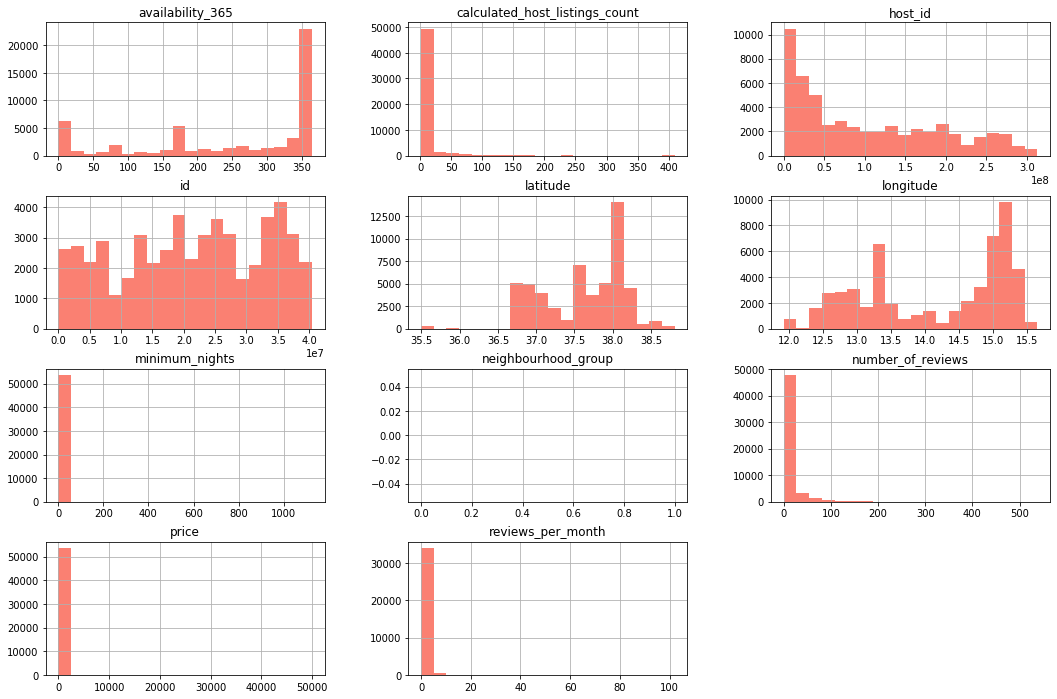

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(18,12), color="salmon");

Opa! Passando o olho por cima dos gráficos, é possível notar a presença de *outliers* em nosso *dataset*.

Por exemplo, as variáveis  `price`, `minimum_nights` e `calculated_host_listings_count` não seguem uma distribuição, e distorcem completamente a representação gráfica.

### **Q4. Existem *outliers* (valores fora da curva) em nosso *dataset*?**

Acho que já respondemos a essa pergunta... 

Enfim, para obtermos uma confirmação do veredito dado anteriormente, vamos analisar um resumo estatístico das variáveis numéricas:


In [0]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,53726.000000,53726.000000,53726.000000,34516.000000,53726.000000,53726.000000
mean,84.796728,2.732774,11.052935,0.732426,11.825224,251.701783
std,250.771867,7.146316,27.887067,1.206253,43.942409,129.826041
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.000000,1.000000,0.000000,0.130000,1.000000,177.000000
50%,60.000000,2.000000,2.000000,0.330000,2.000000,322.000000
75%,90.000000,3.000000,9.000000,0.830000,4.000000,364.000000
max,49999.000000,1125.000000,538.000000,102.060000,410.000000,365.000000


Analisando o resumo estatístico, obtivemos a confirmação das seguintes hipóteses:

* A variável preço (`price`) possui 75% de valores abaixo de 90, porém seu valor máximo é 49999.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.
* A variável `calculated_host_listings_count` possui uma mediana de 2, enquanto seu valor máximo é de 538.

Além disso, podemos plotar um *boxplot* para visualizar os *outliers*

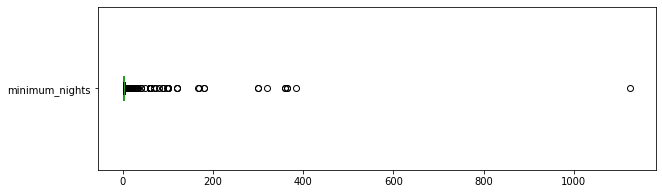

In [0]:
#price
df.price.plot(kind="box", vert=False, figsize=(10, 3))
plt.show()

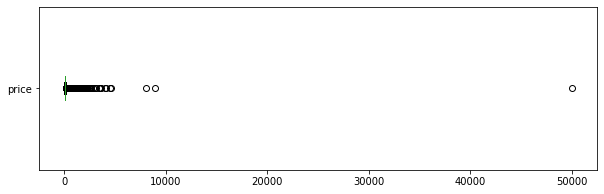

In [0]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(10, 3))
plt.show()

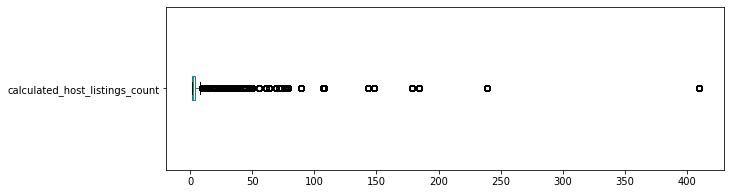

In [0]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind="box", vert=False, figsize=(10, 3))
plt.show()

Mal conseguimos ver o *boxplot* devido à grande presença de *outliers*.

Vamos limpar os dados para ficar mais fácil de visualizarmos:

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 1000].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 20].index, axis = 0, inplace=True)

# remover a variável `neighbourhood_group`, pois não possui dados
df_clean.drop('neighbourhood_group', axis=1, inplace=True)


Vamos visualizar um histograma sem os *outliers*:

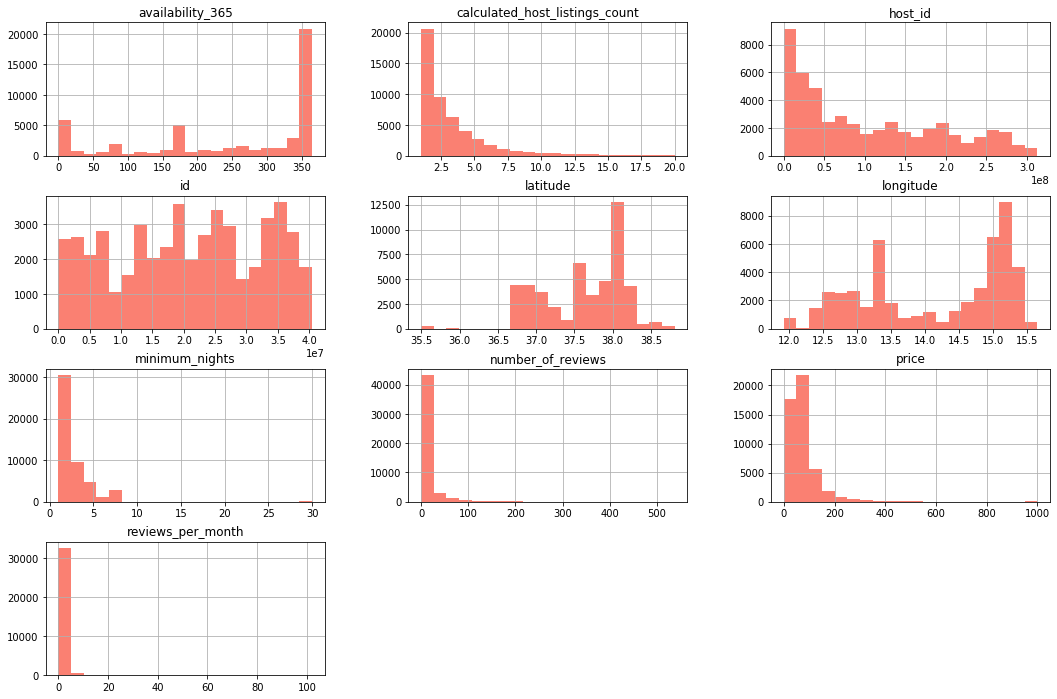

In [0]:
df_clean.hist(bins=20, figsize=(18,12), color="salmon");

Agora sim! 

### **Q4. Qual a correlação existente entre as variáveis?**

Agora que limpamos nosso *dataset*, vamos dar continuidade à nossa análise e verificar a correlação existente entre as variáveis.

A correlação nos indica a relação entre duas variáveis, e é através do coeficiente de correlação que podemos identificar a intensidade dessa relação. 

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.182627,-0.106312,-0.106241,0.108581,0.009948
minimum_nights,0.182627,1.000000,-0.114814,-0.161614,-0.047497,-0.042800
number_of_reviews,-0.106312,-0.114814,1.000000,0.615782,-0.017046,-0.007288
reviews_per_month,-0.106241,-0.161614,0.615782,1.000000,-0.042798,-0.046591
calculated_host_listings_count,0.108581,-0.047497,-0.017046,-0.042798,1.000000,0.055712
availability_365,0.009948,-0.042800,-0.007288,-0.046591,0.055712,1.000000


Como podemos observar, a relação de uma variável com ela mesma sempre nos retorna o valor de 1.  Nem precisamos pensar muito pra explicar o motivo disso acontecer, certo?

Agora, vamos gerar um mapa de calor para visualizarmos melhor a correlação das variáveis.

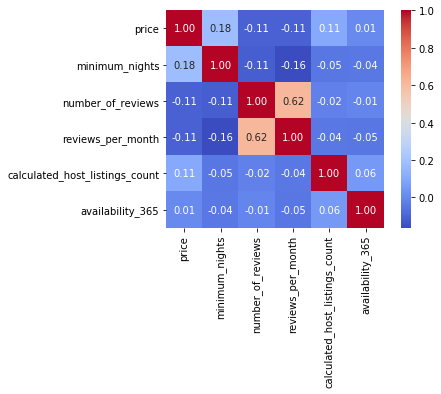

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="coolwarm", fmt = ".2f", linecolor = "white", square=True, annot=True)

Ficou fácil de visualizarmos que além da correlação consigo mesmo, as variáveis que mais possuem correlação possuem o mesmo conceito:

* `number_of_reviews`e `reviews_per_month`, com um grau de correlação positiva de 0.62



### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A variável `room_type` nos mostra o tipo de locação que está anunciada no Airbnb. As opções para o anfitirão ou para o hóspede incluem apartamentos/casas inteiras, apenas o aluguel de um quarto ou até mesmo dividir o quarto com outras pessoas.

Vamos verificar a quantidade de vezes que cada tipo de opção foi anunciada, usando o método `value_counts()`

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    38740
Private room        9439
Hotel room           855
Shared room          136
Name: room_type, dtype: int64

Opa! Esse método nos mostra que para o nosso *dataset*, foram anunciados:

* 38740 apartamentos/casas inteiros
* 9439 quartos privados
* 855 quartos de hotéis
* 136 quartos compartilhados

Agora vamos ver a representatividade de cada um desses tipos de aluguéis.

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.787879
Private room       0.191967
Hotel room         0.017389
Shared room        0.002766
Name: room_type, dtype: float64

Podemos verificar que os tipos mais anunciados são:
* Quarto privado, com aproximadamente *19,1%* de frequência
* Apartamentos/casas inteiros, com a maior frequência: *78,8%*

### **Q6. Qual a localidade mais cara da Sicília?**

Podemos verificar uma variável em função de outra utilizando o método `.groupby()`. Para responder a pergunta acima, vamos comparar os bairros (*neighbourhood*)  baseado no preço (*price*) do aluguel.

In [0]:
# ver os preços por bairros, na média, ordenados do maior para o menor, dos dez primeiros
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Piana degli Albanesi         425.200000
Centuripe                    147.384615
Cefal Diana                  140.000000
Mirto                        135.571429
Vallelunga Pratameno         134.500000
Roccavaldina                 134.000000
Santa Caterina Villarmosa    131.250000
Fondachelli-Fantina          130.625000
Giarratana                   125.555556
Castelmola                   119.715909
Name: price, dtype: float64

Podemos observar que o bairro mais caro, aparentemente, é o *Piana degli Albanesi*. 

Vamos dar uma olhada mais de perto nas entradas desse bairro.

In [0]:
# ver quantidade de imóveis no bairro *Piana degli Albanesi*
print(df[df.neighbourhood == "Piana degli Albanesi"].shape)

# ver as 5 primeiras entradas do bairro *Piana degli Albanesi*
df[df.neighbourhood == "Piana degli Albanesi"][:5]

(15, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17429,14989760,Camera nel verde di Piana degli Albanesi,58965894,Alexandra,NaN,Piana degli Albanesi,37.99900,13.30057,Private room,47,1,0,NaN,NaN,2,365
20277,17815585,Easter in Piana degli Albanesi,121788841,Antonio,NaN,Piana degli Albanesi,37.99669,13.28532,Entire home/apt,22,1,9,2019-08-12,0.31,1,0
37352,28796533,Pernottamento E Colazione in Maneggio,217190797,Daniela,NaN,Piana degli Albanesi,37.98832,13.29675,Private room,25,1,12,2019-11-20,0.85,1,362
37522,29041020,Sicily holiday,218866753,Pecoraro,NaN,Piana degli Albanesi,37.99312,13.27550,Private room,100,1,0,NaN,NaN,1,180
39547,31571357,Le quattro stagioni,215954614,Dario,NaN,Piana degli Albanesi,37.99648,13.28132,Private room,35,1,4,2019-07-24,0.38,2,365


Agora vamos comparar com as entradas do segundo bairro mais caro, *Centuripe*

In [0]:
# ver quantidade de imóveis no bairro *Centuripe*
print(df[df.neighbourhood == "Centuripe"].shape)

# ver as 5 primeiras entradas do bairro *Piana degli Albanesi*
df[df.neighbourhood == "Centuripe"][:5]

(14, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
487,472414,Countryhouse with swimming pool,2342845,Giuseppe,NaN,Centuripe,37.57234,14.78173,Entire home/apt,117,3,56,2019-09-21,0.72,1,288
633,554344,Villa in the centre of Sicily !!,2011335,Marco,NaN,Centuripe,37.55779,14.70927,Entire home/apt,50,1,0,NaN,NaN,1,365
5033,3847352,Apartment Centuripe (Enna),19832816,Tiziano,NaN,Centuripe,37.62665,14.74386,Entire home/apt,39,2,3,2017-08-10,0.07,1,0
5635,4293655,La Vecchia dimora Resort - Villa con piscina,22289775,Maria Grazia,NaN,Centuripe,37.60015,14.75734,Entire home/apt,350,3,24,2019-10-28,0.60,4,0
9647,7458416,balcone sull'etna Casa Biondi,39062417,Sara,NaN,Centuripe,37.61813,14.74724,Entire home/apt,200,3,20,2019-10-07,0.40,1,295


Opa!

A quantidade de entradas é muito parecida, com 15 imóveis na *Piana degli Albanesi* e 14 em *Centuripe*.

Como o Airbnb nos disponibiliza a latitude e longitude dos imóveis, podemos plotar cada um dos pontos em um gráfico de dispersão. 

Vamos considerar `x=longitude` e `y=latitude` e colorir o gráfico com base em `price`

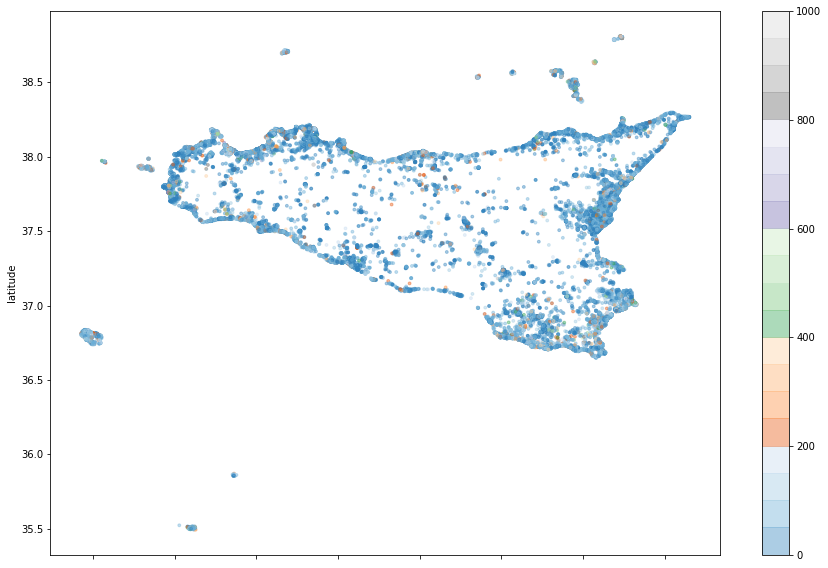

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('tab20c'), figsize=(15,10));

Quem já viu um [Mapa da Sicília](https://upload.wikimedia.org/wikipedia/commons/a/a0/Provinces_of_Sicily_blank_map.png) consegue perceber que a maior parte dos imóveis concentra-se nas bordas da província, ou seja, no litoral da Itália.

## Conclusões


Mesmo que a análise tenha sido superficial, foi possível observar a existência de *outliers* e valores ausentes. Isso nos faz lembrar da importância da Análise Exploratória, bem como a importância de se realizar um tratamento nos dados para verificar e corrigir possíveis inconsistências antes do aprofundamento da análise. 

De maneira resumida, conseguimos identificar:
* a quantidade de entradas/variáveis do *dataset*
* a porcentagem de valores ausentes
* a distribuição das variáveis
* a presença de *outliers*
* a correlação entre as variáveis, demonstradas em um mapa de calor
* os tipos de aluguéis disponívéis, a quantidade nominal e sua frequência
* o preço médio dos imóveis em função do bairro e, por fim
* um mapa (literalmente) demonstrando a distribuição dos imóveis para a província da Sicília

Este *dataset* é uma versão resumida da versão completa (disponível [neste link](http://data.insideairbnb.com/italy/sicilia/sicily/2019-11-29/data/listings.csv.gz)), e foi utilizado apenas para uma abordagem inicial e para entrarmos em contato com os dados. Recomenda-se que em uma eventual análise sejam utilizados os dados brutos completos, com 106 variáveis disponíveis.

